In [354]:
from matplotlib.pyplot import figure, style
style.use("ggplot")
%matplotlib inline

In [355]:
from numpy import array, linspace, sin

In [356]:
from control import tf, step, forced_response

In [357]:
def señal_PWM(DC, f, ts):
    from numpy import array
    T = 1/f
    T_on = T*DC
    sal = []
    for t in ts:
        if t==0:
            sal.append(0)
        else:
            if t%T < T_on:
                sal.append(1)
            else:
                sal.append(0)
    return array(sal)

In [366]:
s1 = lambda t: señal_PWM(0.5, 60, t)

In [367]:
ts = linspace(0, 1, 100000)
señal = s1(ts)

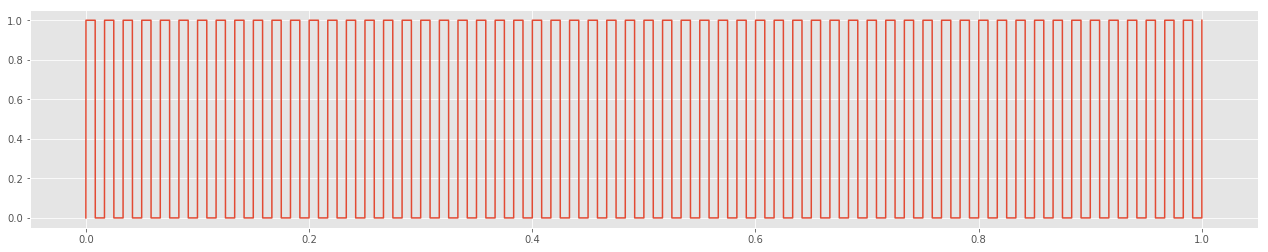

In [368]:
fig = figure(figsize=(22,4))
ax = fig.gca()
ax.plot(ts, señal);

In [369]:
R, L = 8, 0.10
G = 10*tf([1],[L, R])

In [370]:
y, x = step(G)

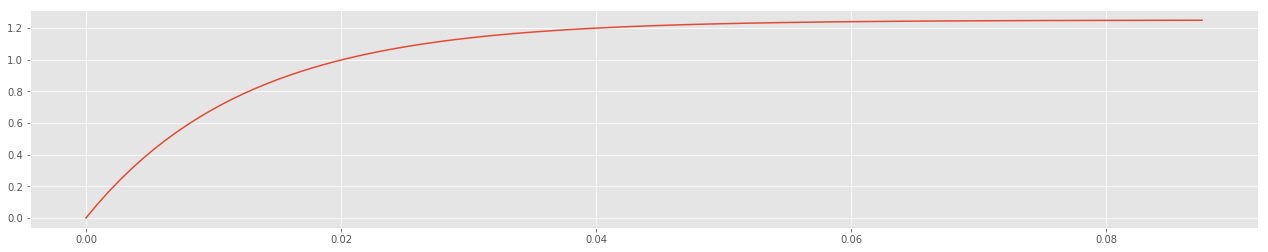

In [371]:
fig = figure(figsize=(22,4))
ax = fig.gca()
ax.plot(x, y);

In [372]:
t, y, x = forced_response(G, ts, señal, 0)

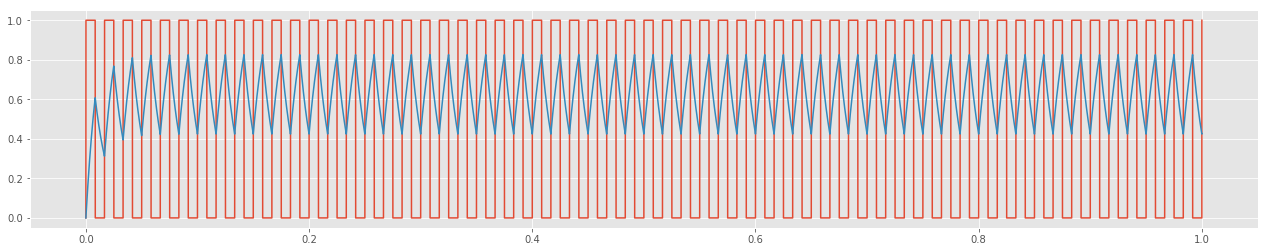

In [373]:
fig = figure(figsize=(22,4))
ax = fig.gca()
ax.plot(ts, señal)
ax.plot(ts, y);

In [374]:
ω = 60
s2 = lambda t: sin(ω*t)

In [375]:
ts = linspace(0, 1, 100000)
señal_sen = s2(ts)

In [376]:
t, y, x = forced_response(G, ts, señal_sen, 0)

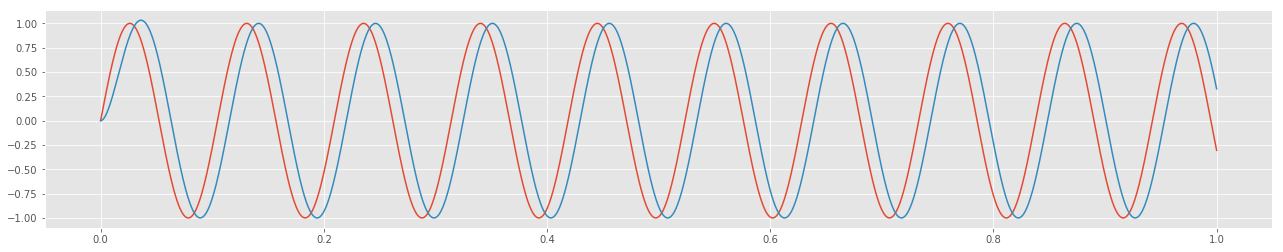

In [377]:
fig = figure(figsize=(22,4))
ax = fig.gca()
ax.plot(ts, señal_sen)
ax.plot(ts, y);

In [378]:
def señal_triangular(f, ts):
    from numpy import array
    T = 1/f
    sal = []
    for t in ts:
        sal.append(2*(t%T)/T)
    return array(sal)

In [379]:
ω = 600
s3 = lambda t: señal_triangular(ω, t)

In [380]:
ts = linspace(0, 1, 100000)
señal_tri = s3(ts)

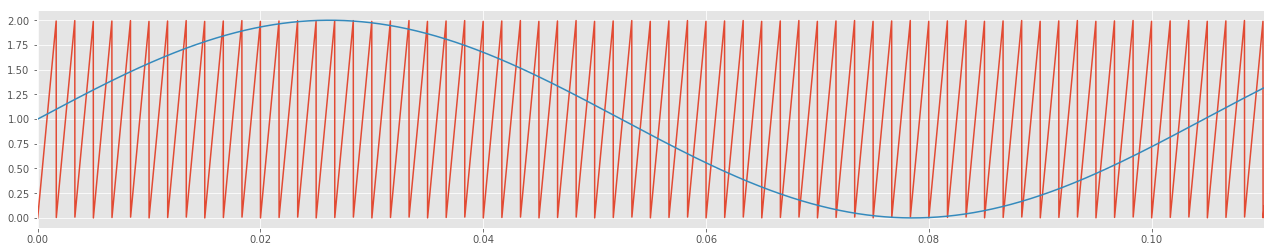

In [381]:
fig = figure(figsize=(22,4))
ax = fig.gca()
ax.plot(ts, señal_tri)
ax.plot(ts, señal_sen+1)
ax.set_xlim(-0.0001,0.1101);

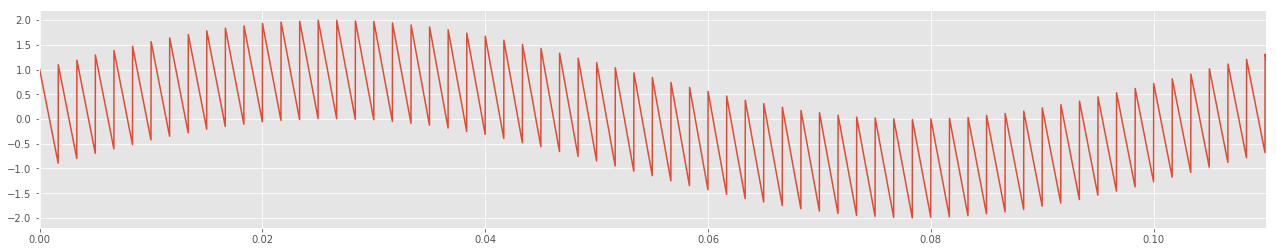

In [347]:
fig = figure(figsize=(22,4))
ax = fig.gca()
ax.plot(ts, señal_sen - señal_tri + 1)
ax.set_xlim(-0.0001,0.1101);

In [349]:
def señal_PWM_impulsada(señal):
    from numpy import array
    sal = []
    for dato in señal:
        if dato > 0:
            sal.append(1)
        else:
            sal.append(0)
    return array(sal)

In [350]:
señal_sen_PWM = señal_PWM_impulsada(señal_sen - señal_tri + 1)

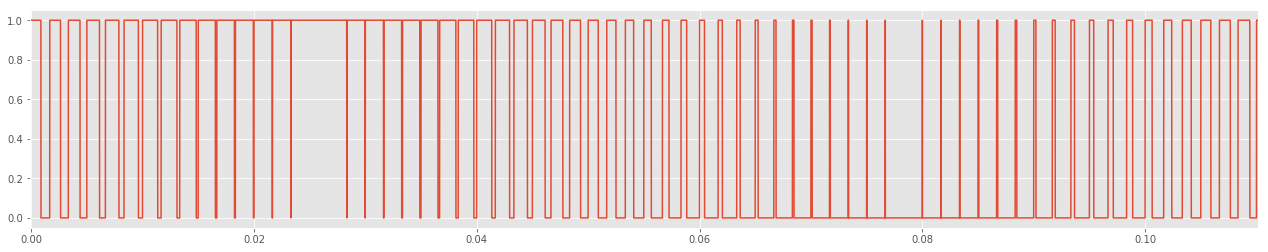

In [351]:
fig = figure(figsize=(22,4))
ax = fig.gca()
ax.plot(ts, señal_sen_PWM)
ax.set_xlim(-0.0001,0.1101);

In [352]:
t, y, x = forced_response(G, ts, señal_sen_PWM, 0)

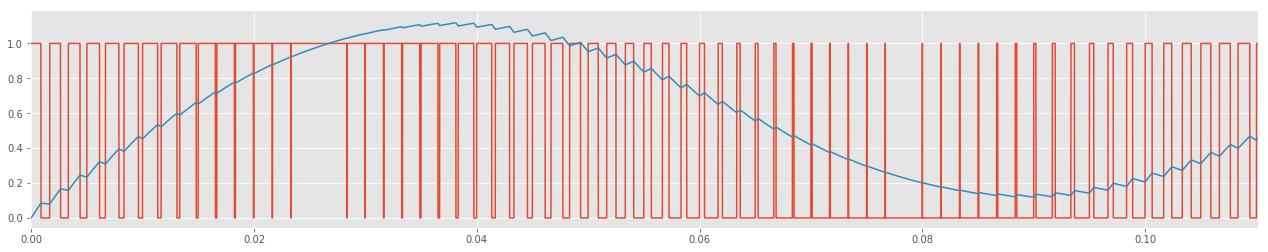

In [353]:
fig = figure(figsize=(22,4))
ax = fig.gca()
ax.plot(ts, señal_sen_PWM )
ax.plot(ts, y);
ax.set_xlim(-0.0001,0.1101);